In [1]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
#to read the dataset
df = pd.read_csv("/home/ayush/Downloads/Default_Fin.csv")
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [3]:
#to see if nan is present or not
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [4]:
df = df.drop(columns =['Index'])
df

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


<AxesSubplot:xlabel='Bank Balance', ylabel='Defaulted?'>

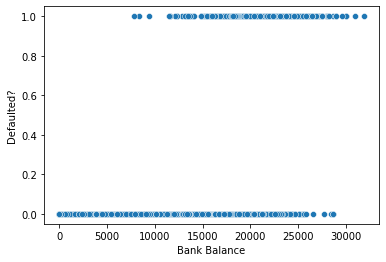

In [5]:
sns.scatterplot(data = df, x ='Bank Balance', y ='Defaulted?')

<AxesSubplot:xlabel='Annual Salary', ylabel='Defaulted?'>

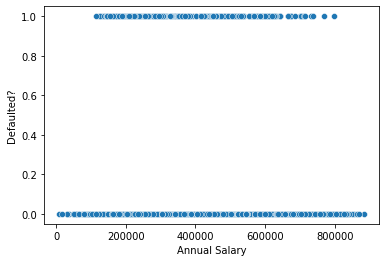

In [6]:
sns.scatterplot(data = df, x ='Annual Salary', y ='Defaulted?')

<AxesSubplot:xlabel='Employed', ylabel='Defaulted?'>

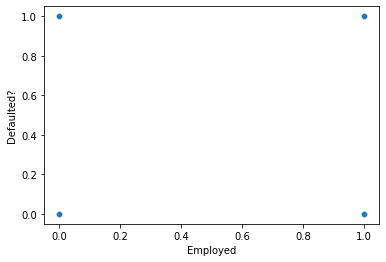

In [7]:
sns.scatterplot(data = df, x ='Employed', y ='Defaulted?')

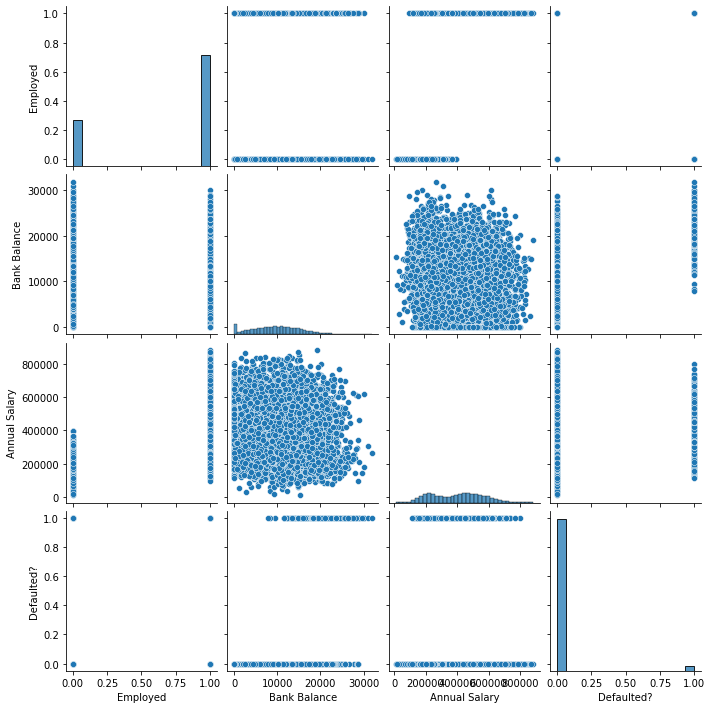

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

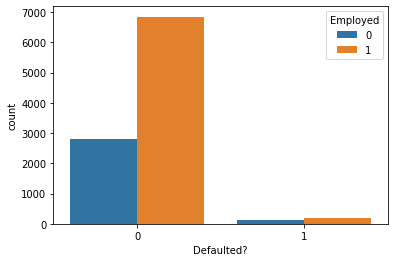

In [9]:
sns.countplot(x='Defaulted?',hue='Employed',data=df)

In [10]:
df['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [11]:
y = df['Defaulted?']
x = df.drop(columns =['Defaulted?'])


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
#model = RandomForestClassifier(criterion='gini', max_depth=1000)
#model.fit(x_train, y_train)
#y_model= model.predict(x_test)
#print('Model accuracy score with Random Forest: {0:0.4f}'. format(accuracy_score(y_test, y_model)))

In [14]:
#logmodel = LogisticRegression()
#logmodel.fit(x_train,y_train)
#predictions = logmodel.predict(x_test)
#print('Model accuracy score with Logistic: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

In [15]:
#upper 2 model rejected since the accuracy was not the highest

In [16]:
model_xg = XGBClassifier(learning_rate =0.01,
 n_estimators=1200,
 max_depth=4, use_label_encoder=False, eval_metric = 'logloss', gamma= 1,max_delta_step =5)
model_xg.fit(x_train, y_train)
y_pred = model_xg.predict(x_test)
print('Model accuracy score with XGB for test: {0:0.5f}'. format(accuracy_score(y_test, y_pred)))
y_p = model_xg.predict(x_train)
print('Model accuracy score with XGB for train: {0:0.5f}'. format(accuracy_score(y_train, y_p)))
#overfitting is minimised here since difference between accuracy in train and test is reduced 

Model accuracy score with XGB for test: 0.97433
Model accuracy score with XGB for train: 0.97714
